# Understanding the appliances energy use in buildings

Appliances represent a significant portion (between 20 and 30%) of the electrical energy demand. Regression models
for energy use can help to understand the relationships between different variables and to quantify their impact. Furthermore, energy consumptions predictions can help to detect abnormal energy use patterns, which could be related with malcfunctioning devices.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

## Is it possible to predict the energy use? 

We make use of the data set provided by [http://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction], which corresponds to measurements done in a house located in Stambruges, which is about 24 km from the City of Mons in Belgium. Data was recorded by using a wireless sensor network, measurements were done at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored. Weather from the nearest airport weather station (Chievres Airport, Belgium) is included in the data set.

## House plans.

<tr>
<td> <img src="../data/FirstFloor_dimensionsremoved.png" alt="Drawing" style="width: 400px;"/> </td>
<td> <img src="../data/SecondFloor_linesremoved.png" alt="Drawing" style="width: 400px;"/> </td>
</tr>

In [4]:
energydata = pd.DataFrame.from_csv('../data/energydata_complete.csv', index_col=None, encoding="utf-8")
energydata["date"] = pd.to_datetime(energydata.date)
energydata["consumedE"] = energydata["Appliances"]+energydata["lights"]
energydata.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,consumedE
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,90
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,90
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,80
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,90
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,100


## Temperature and relative humidity measurements every 10 minutes

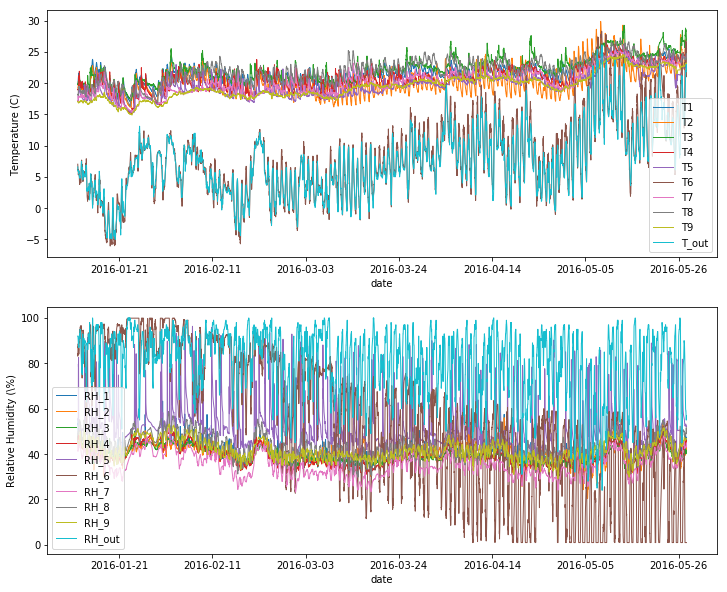

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,10))
for i in range(1,10):
    number = str(i)
    name = "T"+number
    ax[0].plot(energydata.date, energydata[name], linewidth=1.)
    ax[0].legend();
ax[0].plot(energydata.date, energydata["T_out"], linewidth=1.)
ax[0].legend();
ax[0].set_ylabel('Temperature (C)')
ax[0].set_xlabel('date')

for i in range(1,10):
    number = str(i)
    name = "RH_"+number
    ax[1].plot(energydata.date, energydata[name], linewidth=1.)
    ax[1].legend();
ax[1].plot(energydata.date, energydata["RH_out"], linewidth=1.)
ax[1].legend();
ax[1].set_ylabel('Relative Humidity (\%)')
ax[1].set_xlabel('date')

## Mean daily energy consumption

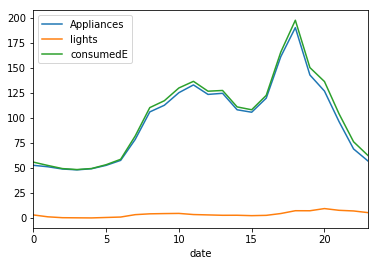

In [7]:
energydata.groupby(energydata.date.dt.hour).Appliances.mean().plot(legend=True)
energydata.groupby(energydata.date.dt.hour).lights.mean().plot(legend=True)
energydata.groupby(energydata.date.dt.hour).consumedE.mean().plot(legend=True)

The energy use in the house was basically due to the appliances, however, theres is a correlation between the energy use by appliances and lights. This implies the presence of people and the consumption, discarting malcfunctioning devices.

## Energy consumed every day

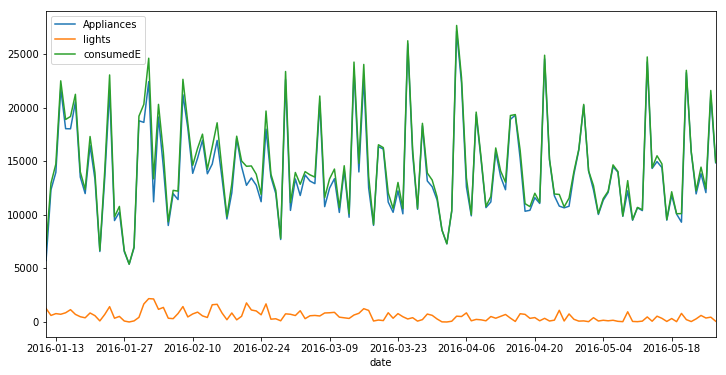

In [43]:
energydata.groupby(energydata.date.dt.date).Appliances.sum().plot(legend=True, figsize=(12,6))
energydata.groupby(energydata.date.dt.date).lights.sum().plot(legend=True, figsize=(12,6))
energydata.groupby(energydata.date.dt.date).consumedE.sum().plot(legend=True, figsize=(12,6))

## Mean energy consumption per day of the week

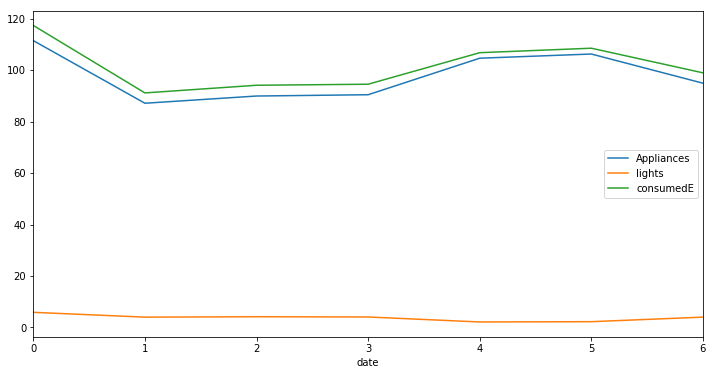

In [13]:
days = {0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Monday"}
energydata.groupby(energydata.date.dt.dayofweek).Appliances.mean().plot(legend=True,figsize=(12,6))
energydata.groupby(energydata.date.dt.dayofweek).lights.mean().plot(legend=True, figsize=(12,6))
energydata.groupby(energydata.date.dt.dayofweek).consumedE.mean().plot(legend=True, figsize=(12,6))

The energy use is higher on Mondays, Fridays and Saturdays.

## Energy comsumed as a function of time 

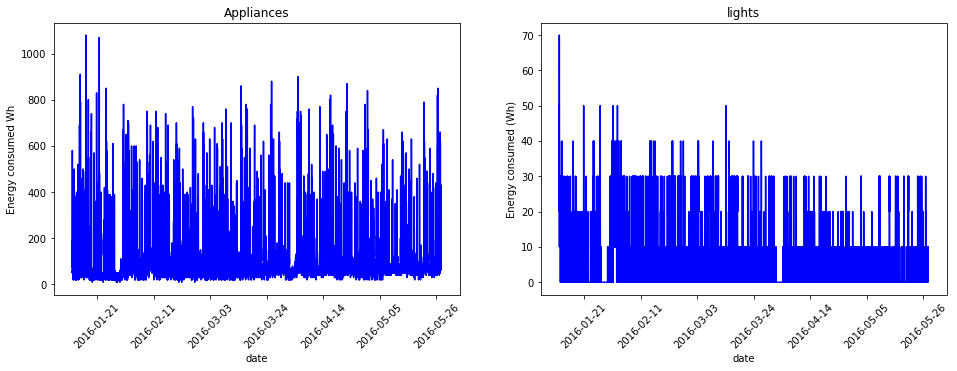

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=45)

axes[0].plot(energydata.date, energydata.Appliances, 'b')
axes[0].set_xlabel('date')
axes[0].set_ylabel('Energy consumed Wh')
axes[0].set_title('Appliances')

plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45)
axes[1].plot(energydata.date, energydata.lights, 'b')
axes[1].set_xlabel('date')
axes[1].set_ylabel('Energy consumed (Wh)')
axes[1].set_title('lights')

Now, let us look closer the histogram of the energy use.

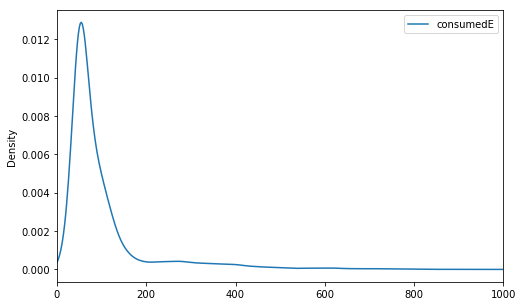

In [21]:
energydata.consumedE.plot(kind="KDE",x=energydata.consumedE,legend=True,figsize=(8,5),xlim=(0,1000))

## Sacatter matrix plot

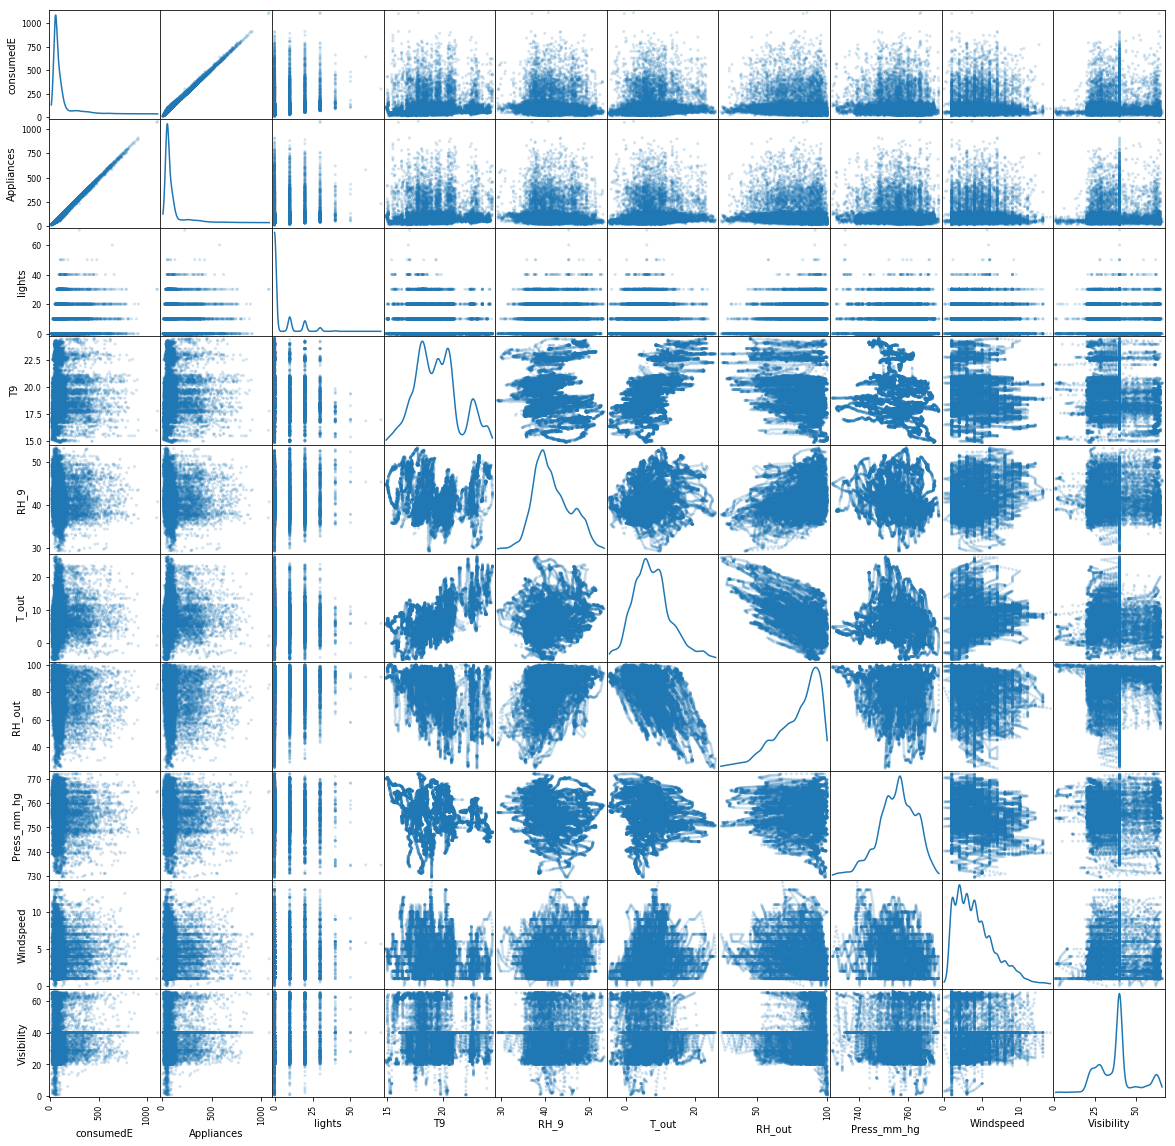

In [14]:
from pandas.plotting import scatter_matrix
axs = scatter_matrix(energydata[["date","consumedE","Appliances","lights","T9","RH_9","T_out","RH_out","Press_mm_hg","Windspeed","Visibility"]], alpha=0.2, diagonal='kde',figsize=(20,20))

## Conclusions

There is a positive correlation between the energy consumption of appliances and lights.
The energy consumption starts to rise around 6 in the morning, then at 6 in the afternoon it achieves a peak, after which the consumption decreases rapidly.
On Mondays, Fridays and Suturdays, the appliances are widely used giving as a result more energy use during these days.

## Variable Description

date time year-month-day hour:minute:second

Appliances, energy use in Wh

lights, energy use of light fixtures in the house in Wh

T1, Temperature in kitchen area, in Celsius

RH_1, Humidity in kitchen area, in %

T2, Temperature in living room area, in Celsius

RH_2, Humidity in living room area, in %

T3, Temperature in laundry room area

RH_3, Humidity in laundry room area, in %

T4, Temperature in office room, in Celsius

RH_4, Humidity in office room, in %

T5, Temperature in bathroom, in Celsius

RH_5, Humidity in bathroom, in %

T6, Temperature outside the building (north side), in Celsius

RH_6, Humidity outside the building (north side), in %

T7, Temperature in ironing room , in Celsius

RH_7, Humidity in ironing room, in %

T8, Temperature in teenager room 2, in Celsius

RH_8, Humidity in teenager room 2, in %

T9, Temperature in parents room, in Celsius

RH_9, Humidity in parents room, in %

To, Temperature outside (from Chièvres weather station), in Celsius

Pressure (from Chièvres weather station), in mm Hg

RH_out, Humidity outside (from Chièvres weather station), in %

Windspeed (from Chièvres weather station), in m/s

Visibility (from Chièvres weather station), in km

Tdewpoint (from Chièvres weather station), °C

rv1, Random variable 1, nondimensional

rv2, Rnadom variable 2, nondimensional